In [36]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline

In [40]:
uploaded_file = files.upload()

Saving Salary_dataset.csv to Salary_dataset.csv


In [52]:
df = pd.read_csv(io.BytesIO(uploaded_file['Salary_dataset.csv']))

In [53]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [54]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [56]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [57]:
# Exibir resumo dos dados faltantes
faltantes = df.isnull().sum()
faltantes_percent = (df.isnull().mean() * 100).round(2)

resultado = pd.DataFrame({
    'Valores Faltantes': faltantes,
    'Percentual (%)': faltantes_percent
})

print("Resumo de dados faltantes:")
print(resultado)

Resumo de dados faltantes:
                 Valores Faltantes  Percentual (%)
YearsExperience                  0             0.0
Salary                           0             0.0


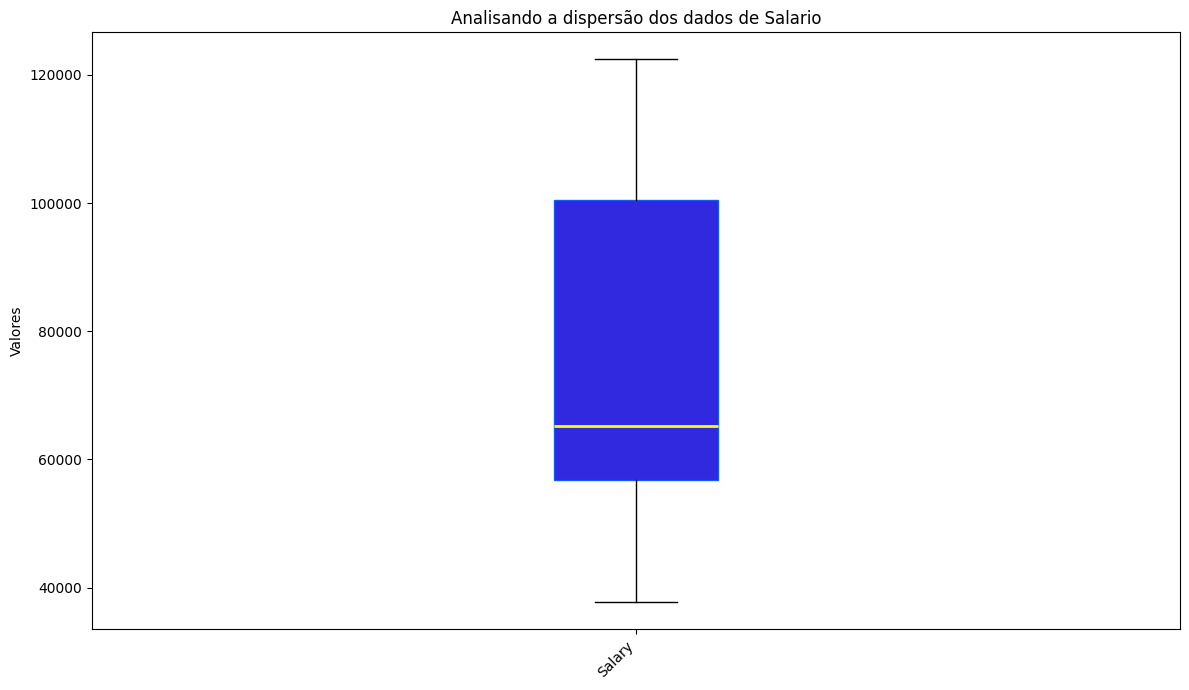

In [58]:
# Grafico de dispersao do campo Salario
plt.figure(figsize=(12, 7))
plt.boxplot(
    [df['Salary'].dropna().values],
    vert=True,
    patch_artist=True,
    showfliers=True,
    boxprops=dict(facecolor="#1A11DD", color="#0055FF", alpha=0.9),
    medianprops=dict(color="yellow", linewidth=2),
    flierprops=dict(marker='o', markerfacecolor="red", markersize=4, alpha=0.6),
)
plt.title("Analisando a dispersão dos dados de Salario")
plt.xticks(ticks=[1], labels=['Salary'], rotation=45, ha='right')
plt.ylabel("Valores")
plt.tight_layout()
plt.show()

## Separação dos dados, holdout


In [61]:
X_train, X_test, y_train, y_test = train_test_split(df[['YearsExperience']],
                                                    df['Salary'],
                                                    test_size=0.2,
                                                    random_state=42)

In [62]:
# Instancia o modelo
reg = LinearRegression()

# Treina no conjunto de treino
reg.fit(X_train, y_train)


LinearRegression()

In [63]:
# Executa o modelo treinado na base de teste
y_test_pred = reg.predict(X_test)

# Visualiza as primeiras previsões
print("Previsões (teste):", y_test_pred[:5])

Previsões (teste): [115791.21011287  71499.27809463 102597.86866063  75268.80422384
  55478.79204548]


In [64]:
#treino

score_train = reg.score(X_train, y_train)
print(f"Score de treino (R²): {score_train:.4f}")

Score de treino (R²): 0.9645


In [65]:
#teste

score_test = reg.score(X_test, y_test)
print(f"Score de teste (R²): {score_test:.4f}")

Score de teste (R²): 0.9024


In [66]:
def print_metrics(y_test_in, y_test_pred_in):
  print("MEAN: ", mean_absolute_error(y_test_in, y_test_pred_in))
  print("MAPE: ", mean_absolute_percentage_error(y_test_in, y_test_pred_in))
  print("MSE: ", mean_squared_error(y_test_in, y_test_pred_in))
  print("RMSE: ", np.sqrt(mean_squared_error(y_test_in, y_test_pred_in)))
  print("R²: ", r2_score(y_test_in, y_test_pred_in))

In [67]:
# Avaliação nos dados de teste
print("Dados de TESTE:")
print_metrics(y_test, y_test_pred)

Dados de TESTE:
MEAN:  6286.453830757745
MAPE:  0.07744778459829141
MSE:  49830096.855908394
RMSE:  7059.04362190151
R²:  0.9024461774180497


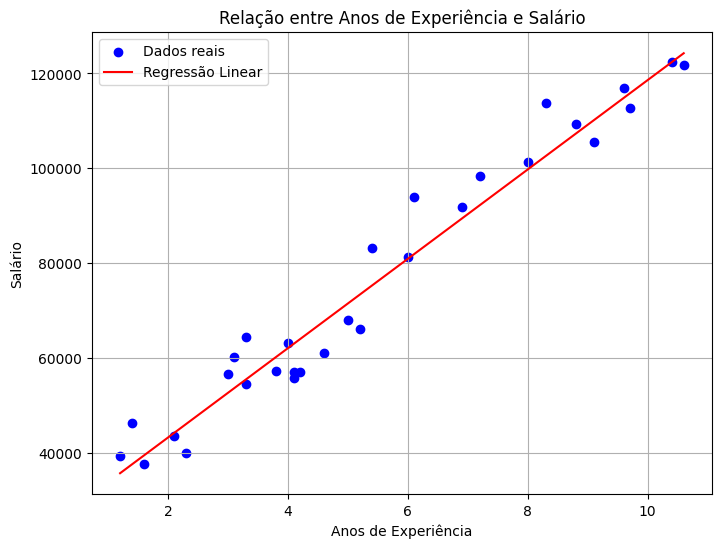

In [70]:
# Gráfico de Regressão
plt.figure(figsize=(8,6))
plt.scatter(df[["YearsExperience"]], df["Salary"], color="blue", label="Dados reais")
plt.plot(df[["YearsExperience"]], reg.predict(df[["YearsExperience"]]), color="red", label="Regressão Linear")
plt.title("Relação entre Anos de Experiência e Salário")
plt.xlabel("Anos de Experiência")
plt.ylabel("Salário")
plt.legend()
plt.grid(True)
plt.show()